In [204]:
import numpy as np
from scipy import stats
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
titanic = pd.read_csv("Data/train.csv")

In [221]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Alived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Alived,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Alived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Dead,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton


In [148]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [138]:
def height_notation(plot , coordinator, type_of_height = int):
    for p in plot.patches:
        height = p.get_height().round(2)
        text = str(type_of_height(height))
        plot.text(p.get_x() + p.get_width() / 2 , height + coordinator , text , ha = "center")

In [92]:
survived_dict = {0: "Dead", 1: "Alived"}
titanic["Survived"] = titanic["Survived"].map(survived_dict)

In [188]:
sex_dict = {'male':'Male' , 'female':'Female'}
titanic['Sex'] = titanic['Sex'].map(sex_dict)

In [93]:
class_dict = {1: "First Class", 2: "Second Class", 3: "Third Class"}
titanic["Pclass"] = titanic["Pclass"].map(class_dict)

In [94]:
embarked_dict = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
titanic["Embarked"] = titanic["Embarked"].map(embarked_dict)

In [149]:
survived_sex = pd.crosstab(titanic["Survived"], titanic["Sex"]).reset_index()

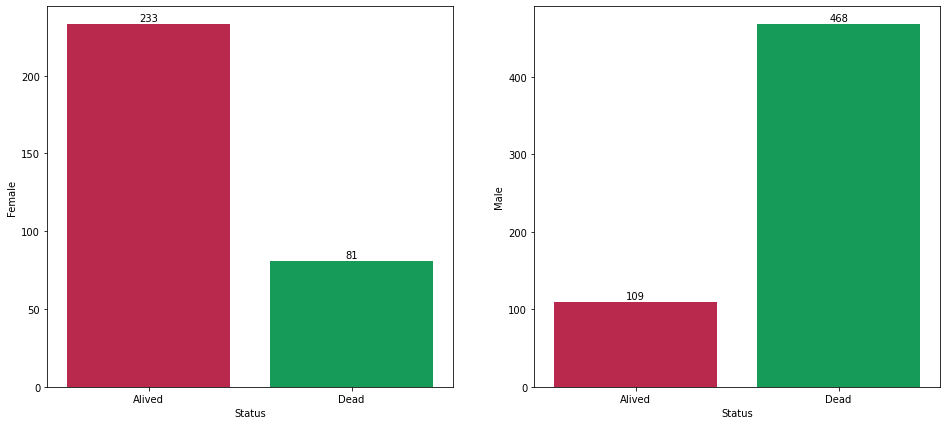

In [151]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
# Female Survived
survived_female = sns.barplot(x = survived_sex["Survived"], y = "female", data= survived_sex,
                       palette = ['#D11141', '#00B159'], ax = axis[0])
height_notation(survived_female, coordinator = 2)
survived_female.set_xlabel("Status")
survived_female.set_ylabel("Female")
# Male Survived
survived_male = sns.barplot(x = survived_sex["Survived"], y = "male", data= survived_sex,
                       palette = ['#D11141', '#00B159'], ax = axis[1])
height_notation(survived_male, coordinator = 4)
survived_male.set_xlabel("Status")
survived_male.set_ylabel("Male")
plt.show()

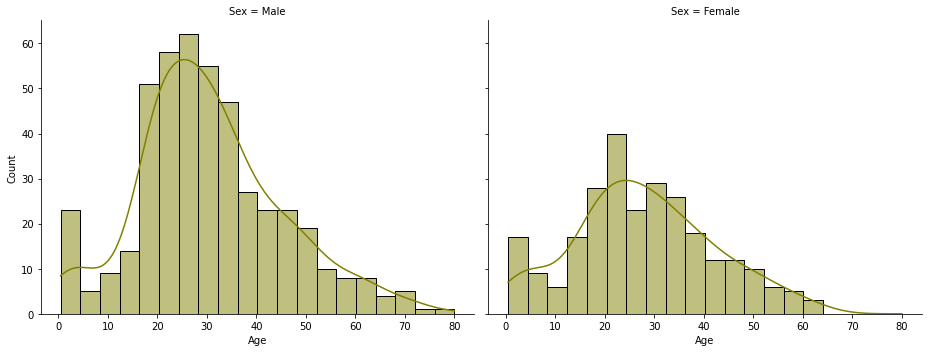

In [189]:
sns.displot(x= "Age", data = titanic, col = "Sex", kde = True, color = "olive", aspect= 1.3)
plt.show()

In [219]:
sex_summary_stats = titanic.groupby("Sex").agg({"Age": [np.min, np.median, np.mean, np.max]})
sex_summary_stats.columns = ["Age Min", "Age Median", "Age Mean", "Age Max"]
sex_summary_stats = sex_summary_stats.reset_index()

In [220]:
sex_summary_stats

,Sex,Age Min,Age Median,Age Mean,Age Max
0,Female,0.75,27.0,27.915709,63.0
1,Male,0.42,29.0,30.726645,80.0


In [ ]:
titanic["SibSp"].value_counts()